# Feature Droper

A transformer object that delete columns, according to the selected features

> from mlearner.preprocessing import FeatureDroper

## Example 1 - Droper features

Use the `fit` method to fit the column droped (e.g., the training dataset) to a new `FeatureDroper` object. Then, call the `transform` method on the same dataframe to apply drop.

In [1]:
import pandas as pd
from droper import FeatureDropper
X_train = pd.DataFrame({"a": [0, 1], "b": [10, 11], "c": [20, 21]})
fd = FeatureDropper(drop=["a", "b"]).fit(X_train)
fd.transform(X_train)

,c
0,20
1,21


## API

In [2]:
with open('../../api_modules/mlearner.preprocessing/FeatureDropper.md', 'r') as f:
    print(f.read())

FileNotFoundError: [Errno 2] No such file or directory: '../../api_modules/mlearner.preprocessing/FeatureDropper.md'

In [3]:
data = pd.DataFrame({"a": [2, 2, 2, float('nan'), 4, 5], "b": ["OK", 2, 2, 2, 4, 5]})
data1 = pd.DataFrame({"a": [2, 5, 2, 5, 4, 5], "b": [2, 2, 2, 2, 4, 5]})


(array([6.0000e+00, 1.4200e+02, 1.9800e+03, 1.1785e+04, 2.9731e+04,
        3.4400e+04, 1.7595e+04, 3.9990e+03, 3.4200e+02, 2.0000e+01]),
 array([-6.62023115, -4.27788425, -1.93553735,  0.40680955,  2.74915644,
         5.09150334,  7.43385024,  9.77619714, 12.11854403, 14.46089093,
        16.80323783]),
 <a list of 10 Patch objects>)

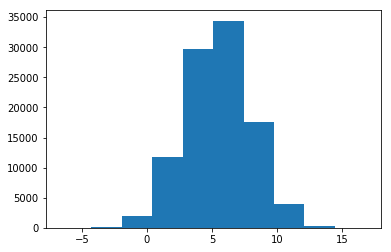

In [88]:
import numpy as np
import matplotlib.pyplot as plt

mu = 5.5
sd = 2.5

# n = 100000
data = mu + sd * np.random.randn(n)
plt.hist(data)

In [5]:
np.mean(data)

5.4918210862616785

In [6]:
len(data)

100000

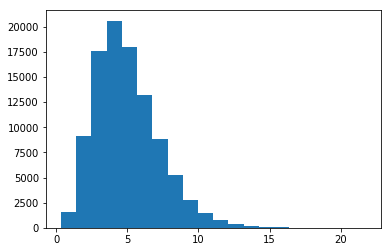

In [30]:
from scipy import stats
a = 5 # parametro de forma.
gamma = stats.gamma(a)
aleatorios = gamma.rvs(n)
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)

In [73]:
stats.gamma(a).rvs(n)

array([6.61070736, 5.31778367, 5.26890642, ..., 6.37917126, 8.01286051,
       6.79094321])

In [31]:
np.mean(aleatorios)

5.009589096453011

In [32]:
np.median(aleatorios)

4.684033649752621

In [82]:
data2 = pd.DataFrame(
		{
			'A' : stats.gamma(5).rvs(n),
			'B' : stats.gamma(4).rvs(n),
			'C' : stats.gamma(3.5).rvs(n),
            'D' : stats.gamma(2).rvs(n)
		}
	)
data3 = data2.copy()


In [91]:
np.asarray(data2)

array([[2.32096187, 1.80752586, 1.08131413, 0.73592574],
       [2.01028678, 1.80911368, 1.65554799, 0.54522392],
       [1.18477085, 1.31301772, 1.2711323 , 1.83982583],
       ...,
       [1.79164896, 1.00784965, 0.89476773, 0.9403549 ],
       [2.09758147, 1.97828452, 1.59277194, 0.68447513],
       [1.4974987 , 1.87959453, 1.07878177, 1.37525048]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019806A9AFD0>,
      dtype=object)

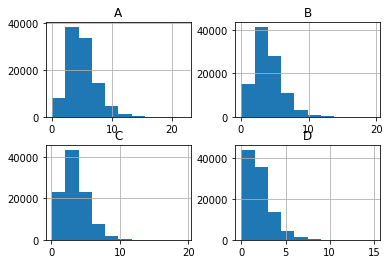

In [83]:
data3.hist()

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import skew  
from sklearn.pipeline import Pipeline

class FixSkewnessTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns = None):
        self.columns = columns

    def fit(self, X, y=None, **fit_params):
        if self.columns is None:
            self.columns = X.select_dtypes(exclude = ["object"]).columns 
        skewness = X[self.columns].apply(lambda x: skew(x))
        skewness = skewness[abs(skewness)>0.5]
        self.skew_features = skewness.index
        return self

    def transform(self, X):
        X[self.skew_features] = np.log1p(X[self.skew_features])
        return X

In [94]:
tskew = FixSkewnessTransformer()
tskew.fit(data2)
train = tskew.transform(data2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019806E697F0>,
      dtype=object)

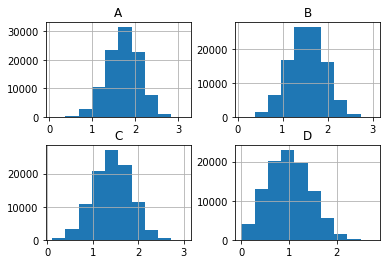

In [87]:
train.hist()

In [89]:
dictado = {
			'A' : np.random.randn(n),
			'B' : 1.5 + 2.5 * np.random.randn(n),
			'C' : np.random.uniform(5, 32, n),
            'D' : aleatorios 
		}

In [90]:
type(dictado)

dict

In [92]:
np.repeat("a", 5)

array(['a', 'a', 'a', 'a', 'a'], dtype='<U1')

In [140]:
n = 5
config = {
        'A': stats.gamma(2.5).rvs(n),
        'B': stats.gamma(3.5).rvs(n),
        'C': stats.gamma(4).rvs(n),
        'D': stats.gamma(5).rvs(n),
        'E': np.repeat("KO", n)
    }
data_out = pd.DataFrame(config)

In [141]:
tskew = FixSkewnessTransformer()
tskew.fit(data_out)
train = tskew.transform(data_out)

In [156]:
out = np.squeeze(train["D"].values)

In [157]:
np.median(out)

2.6017487004784163

In [163]:
train["E"].values.all()

'KO'

In [160]:
a = np.repeat("KO", n).astype("object")
a

array(['KO', 'KO', 'KO', 'KO', 'KO'], dtype=object)

In [162]:
a.all()

'KO'

In [161]:
assert(train["E"].values == a)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [164]:
class OneHotEncoder(BaseEstimator, TransformerMixin):
    # numerical - numerical columns to be treated as categorical
    # columns - columns to use (if None then all categorical variables are included)
    def __init__(self, columns=None, numerical=[]):
        self.numerical = numerical
        self.columns = columns

    def fit(self, X, y=None, **fit_params):
        # if none specified – get all non numerical columns
        if self.columns == None:
            self.columns = X.select_dtypes(include = ["object"]).columns.tolist()
        self.columns += self.numerical
        # get all possible column values to filter not seen values
        self.allowed_columns = [ "{}_{}".format(column, val) for column in self.columns for val in X[column].unique() ]
        return self

    def transform(self, X, y=None, **fit_params):
        # cast numerical columns to strings 
        for col in X[self.columns].select_dtypes(exclude = ["object"]).columns:
            X[col] = X[col].astype('str')
        one_hots = pd.get_dummies(X[self.columns], prefix=self.columns)
        missing_cols = set(self.allowed_columns) - set(one_hots.columns)
        for c in missing_cols:
            one_hots[c] = 0
        return pd.concat([X.drop(self.columns, axis=1), one_hots.filter(self.allowed_columns)], axis=1)


In [224]:
config = {
        'A': ["Y", "N", "Y", "N"],
        'B': [1, 2, 1, 2]
    }
train = pd.DataFrame(config)

In [225]:
print(train.columns)
to = OneHotEncoder()
to.fit(train)
train = to.transform(train)
print(train.columns)
print(train.select_dtypes(include = ["object"]).columns)

Index(['A', 'B'], dtype='object')
Index(['B', 'A_Y', 'A_N'], dtype='object')
Index([], dtype='object')


In [226]:
train

,B,A_Y,A_N
0,1,1,0
1,2,0,1
2,1,1,0
3,2,0,1


In [210]:
train.select_dtypes(include = ["object"]).columns

Index([], dtype='object')

In [228]:
train["B"]

0    1
1    2
2    1
3    2
Name: B, dtype: int64

In [214]:
type(train["A_Y"].values[0])

numpy.uint8

In [230]:
test = pd.DataFrame(config)

In [232]:
 isinstance(test, list)

False

In [235]:
np.asarray(test)

array([['Y', 1],
       ['N', 2],
       ['Y', 1],
       ['N', 2]], dtype=object)

In [220]:
config_result_1 = {
        'A_Y': [1, 0, 1, 0],
        'A_N': [0, 1, 0, 1],
        'B_1': [1, 0, 1, 0],
        'B_2': [0, 1, 0, 1]
    }
data_result_1 = pd.DataFrame(config_result_1).astype(np.uint8)

In [237]:
mapping={"yes": 1, "no": 0}
mapping

{'yes': 1, 'no': 0}

In [252]:
mapping.values()

dict_values([1, 0])

In [254]:
list(mapping)

['yes', 'no']

In [257]:
data_result_1["A_Y"].unique().tolist()

[1, 0]

In [312]:
data = pd.DataFrame({"a": ["car", "car", "car", "car", "car", "house"], "b": [1, 1, 1, 1, 1, 0]})
data_out1 = pd.DataFrame({"a": ["car", "car", "car", "car", "car", "house"], "b": ["OK", "OK", "OK", "OK", "OK", "NOK"]})
data_out2 = pd.DataFrame({"a": ["OK", "OK", "OK", "OK", "OK", "NOK"], "b": [1, 1, 1, 1, 1, 0]})

In [313]:
mapping2 = {1: "OK", 0: "KO"}
mapping1 = {"car": "OK", "house": "KO"}
mapping_no_exist = {"car": "OK", "horse": "KO"}

In [314]:
data

,a,b
0,car,1
1,car,1
2,car,1
3,car,1
4,car,1
5,house,0


In [315]:
def replace_multiclass(data, target="target"):
        
    _unic = data[target].unique().tolist()
    print(_unic)
    _remp = np.arange(0, len(_unic)).tolist()
    print(_remp)

    return data[target].replace(_unic, _remp, inplace=True)


In [322]:
replace_multiclass(data, target="b")

[1, 0]
[0, 1]


In [323]:
data

,a,b
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1


In [300]:
data.dtypes

a    object
b     int64
dtype: object

In [324]:
data["a"].unique()

array([0, 1], dtype=int64)

In [327]:
data.columns.tolist()

['a', 'b']

In [328]:
if 'b' not in data.columns.tolist():
    print("x")

In [333]:

data = pd.DataFrame({"a": ["car", "car", "car", "car", "car", "house"],
                        "b": ["car1", "car1", float('nan'), "car1", "car1", "house1"],
                        "t": [1, 1, 1, 1, 1, 0]})

In [338]:
data

,a,b,t
0,car,car1,1
1,car,car1,1
2,car,NaN,1
3,car,car1,1
4,car,car1,1
5,house,house1,0


In [334]:
def missing_values(data):
    """
    Número de valores vacios en el dataframe.
    """
    # Number of missing in each column
    missing = pd.DataFrame(data.isnull().sum()).rename(columns={0: 'total'})
    _miss = missing.sort_values('total', ascending=False)
    return _miss

In [337]:
missing_values(data)

,total
b,1
a,0
t,0


In [350]:
list(data.columns)

['a', 'b', 't']

In [354]:
data["b"].dtype == "object"

True

In [357]:
def categorical_vs_numerical(data):
    categorical_list = []
    numerical_list = []
    for i in data.columns.tolist():
        if data[i].dtype == 'object':
            categorical_list.append(i)
        else:
            numerical_list.append(i)
    print('Number of categorical features:', str(len(categorical_list)))
    print('Number of numerical features:', str(len(numerical_list)))
    
    return categorical_list, numerical_list

In [358]:
categorical_vs_numerical(data)

Number of categorical features: 2
Number of numerical features: 1


(['a', 'b'], ['t'])

In [361]:
def type_object(data):
    """
    Detección de de categorias con type "object"
    """
    var = [i for i in list(data.columns) if data[i].dtype == np.object]
    return var

In [362]:
type_object(data)

['a', 'b']